<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_01_EDA_extradata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

## 1.0 Functions:

In [4]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

## **Importing the Dataset**

## **Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [5]:
#df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_train.csv", index_col=0)
#df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_test.csv", index_col=0)

#df_test.shape,df_train.shape

In [6]:
#df_train.p_num.unique()

In [7]:
# df_train.head(5)
# df_test['bg+1:00'] = np.nan

In [8]:
# int_cols = df_train.select_dtypes(include=['int']).columns.tolist()
# float_cols = df_train.select_dtypes(include=['float']).columns.tolist()
# obj_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# df_train[int_cols] = df_train[int_cols].astype("int32")
# df_train[float_cols] = df_train[float_cols].astype("float32")
# df_train[obj_cols] = df_train[obj_cols].astype("string")

# df_test[int_cols] = df_test[int_cols].astype("int32")
# df_test[float_cols] = df_test[float_cols].astype("float32")
# df_test[obj_cols] = df_test[obj_cols].astype("string")

In [9]:
# df_train['time'] = pd.to_datetime(df_train['hour'].astype(str) + ':' + df_train['minute'].astype(str), format='%H:%M')
# df_test['time'] = pd.to_datetime(df_test['hour'].astype(str) + ':' + df_test['minute'].astype(str), format='%H:%M')

In [10]:
# df_all = pd.concat([df_train,df_test])

In [11]:
# df_train.isna().sum().sum(),df_test.isna().sum().sum(),df_all.isna().sum().sum()

In [12]:
# df_all.shape

In [13]:
# df_all.shape[0]

In [14]:
# del df_train
gc.collect()

0

In [15]:
ts=['-5:55', '-5:50', '-5:45', '-5:40', '-5:35', '-5:30', '-5:25', '-5:20', '-5:15', '-5:10', '-5:05', '-5:00', '-4:55', '-4:50', '-4:45', '-4:40', '-4:35', '-4:30', '-4:25', '-4:20', '-4:15', '-4:10', '-4:05', '-4:00', '-3:55', '-3:50', '-3:45', '-3:40',
    '-3:35', '-3:30', '-3:25', '-3:20', '-3:15', '-3:10', '-3:05', '-3:00', '-2:55', '-2:50', '-2:45', '-2:40', '-2:35', '-2:30', '-2:25', '-2:20', '-2:15', '-2:10', '-2:05', '-2:00', '-1:55', '-1:50', '-1:45', '-1:40', '-1:35', '-1:30', '-1:25', '-1:20',
    '-1:15', '-1:10', '-1:05', '-1:00', '-0:55', '-0:50', '-0:45', '-0:40', '-0:35', '-0:30', '-0:25', '-0:20', '-0:15', '-0:10', '-0:05', '-0:00']

len(ts)

72

In [16]:
# df_all.reset_index(inplace=True, drop=True)

* **With Pandas**

In [17]:
# max_time = 32
# orig_time = 72
# # Define list of columns:
# ls_new_activity = ["activity"+str(i) for i in range(max_time)]
# ls_new_bg = ["bg"+str(i) for i in range(max_time)]
# ls_new_cals = ["cals"+str(i) for i in range(max_time)]
# ls_new_carbs = ["carb"+str(i) for i in range(max_time)]
# ls_new_hr = ["hr"+str(i) for i in range(max_time)]
# ls_new_insulin = ["insulin"+str(i) for i in range(max_time)]
# ls_new_steps = ["steps"+str(i) for i in range(max_time)]
# static = ["p_num", "time"]
# target = ["bg+1:00"]

# all_cols_new = static + ls_new_activity + ls_new_bg + ls_new_cals + ls_new_carbs + ls_new_hr + ls_new_insulin + ls_new_steps + target

# new_data_df = pd.DataFrame(columns=all_cols_new)

# print(len(all_cols_new),new_data_df.shape)

In [18]:
# df_new_activity = df_all.filter(regex='activity')
# df_new_bg = df_all.filter(regex='bg')
# df_new_bg.drop(columns=['bg+1:00'], inplace=True)
# df_new_cals = df_all.filter(regex='cals')
# df_new_carbs = df_all.filter(regex='carbs')
# df_new_hr = df_all.filter(regex='hr')
# df_new_insulin = df_all.filter(regex='insulin')
# df_new_steps = df_all.filter(regex='steps')

In [19]:
# for i in tqdm(range(df_all.shape[0])):
#   new_data_df_temp = pd.DataFrame(index=list(range(29)),columns=all_cols_new)

#   if i%10000==0:
#     gc.collect()

#   new_data_df_temp.loc[0,ls_new_activity] = df_new_activity.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_bg] = df_new_bg.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_cals] = df_new_cals.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_carbs] = df_new_carbs.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_hr] = df_new_hr.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_insulin] = df_new_insulin.iloc[i,-max_time:].values.astype(np.float32)
#   new_data_df_temp.loc[0,ls_new_steps] = df_new_steps.iloc[i,-max_time:].values.astype(np.float32)

#   new_data_df_temp.loc[0,"p_num"] = df_all.loc[i,"p_num"]
#   new_data_df_temp.loc[0,target] = df_all.loc[i,"bg+1:00"]
#   new_data_df_temp.loc[0,"time"] = df_all.loc[i,"time"]

#   for num, mt in enumerate(range(orig_time-max_time-12), start=1):
#     new_data_df_temp.loc[num,ls_new_activity] = df_new_activity.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_bg] = df_new_bg.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_cals] = df_new_cals.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_carbs] = df_new_carbs.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_hr] = df_new_hr.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_insulin] = df_new_insulin.iloc[i,0+mt:max_time+mt].values.astype(np.float32)
#     new_data_df_temp.loc[num,ls_new_steps] = df_new_steps.iloc[i,0+mt:max_time+mt].values.astype(np.float32)

#     new_data_df_temp.loc[num,target] = df_all.loc[i,f"bg{ts[max_time+mt+12]}"]
#     new_data_df_temp.loc[num,"time"] = df_all.loc[i,"time"] - pd.Timedelta(minutes=5*(72-(max_time+mt+12)))
#     new_data_df_temp.loc[num,"p_num"] = df_all.loc[i,"p_num"]

#   new_data_df = pd.concat([new_data_df,new_data_df_temp],ignore_index=True)

In [20]:
# new_data_df.isnull().sum().sum()

* **Mixed Approach**

In [21]:
# # Constants
# max_time = 32
# orig_time = 72

# # Precompute column lists
# ls_new_activity = [f"activity{i}" for i in range(max_time)]
# ls_new_bg = [f"bg{i}" for i in range(max_time)]
# ls_new_cals = [f"cals{i}" for i in range(max_time)]
# ls_new_carbs = [f"carb{i}" for i in range(max_time)]
# ls_new_hr = [f"hr{i}" for i in range(max_time)]
# ls_new_insulin = [f"insulin{i}" for i in range(max_time)]
# ls_new_steps = [f"steps{i}" for i in range(max_time)]
# static = ["p_num", "time"]
# target = ["bg+1:00"]

# all_cols_new = static + ls_new_activity + ls_new_bg + ls_new_cals + ls_new_carbs + ls_new_hr + ls_new_insulin + ls_new_steps + target


# # Extract required columns as NumPy arrays
# df_new_activity = df_all.filter(regex='activity').values.astype(np.float32)
# df_new_bg = df_all.filter(regex='bg').drop(columns=['bg+1:00']).values.astype(np.float32)
# df_new_cals = df_all.filter(regex='cals').values.astype(np.float32)
# df_new_carbs = df_all.filter(regex='carbs').values.astype(np.float32)
# df_new_hr = df_all.filter(regex='hr').values.astype(np.float32)
# df_new_insulin = df_all.filter(regex='insulin').values.astype(np.float32)
# df_new_steps = df_all.filter(regex='steps').values.astype(np.float32)

# # Initialize lists for batch processing
# final_data = []
# check_chunk=0

# for i in tqdm(range(df_all.shape[0])):

#     if i%10000==0:
#       gc.collect()

#     row_data = []

#     # Process initial row
#     base_row = [
#         df_all.loc[i, "p_num"],
#         df_all.loc[i, "time"],
#         *df_new_activity[i, -max_time:],
#         *df_new_bg[i, -max_time:],
#         *df_new_cals[i, -max_time:],
#         *df_new_carbs[i, -max_time:],
#         *df_new_hr[i, -max_time:],
#         *df_new_insulin[i, -max_time:],
#         *df_new_steps[i, -max_time:],
#         df_all.loc[i, "bg+1:00"]
#     ]
#     row_data.append(base_row)

#     # Process shifted rows
#     for mt in range(orig_time - max_time - 12):
#         offset = max_time + mt
#         shifted_row = [
#             df_all.loc[i, "p_num"],
#             df_all.loc[i, "time"] - pd.Timedelta(minutes=5 * (72 - offset - 12)),
#             *df_new_activity[i, mt:offset],
#             *df_new_bg[i, mt:offset],
#             *df_new_cals[i, mt:offset],
#             *df_new_carbs[i, mt:offset],
#             *df_new_hr[i, mt:offset],
#             *df_new_insulin[i, mt:offset],
#             *df_new_steps[i, mt:offset],
#             df_all.loc[i, f"bg{ts[max_time+mt+12]}"]
#         ]
#         row_data.append(shifted_row)

#     # Append to final_data
#     final_data.extend(row_data)
#     if i%50_000==0 and i>0:
#       pd.DataFrame(final_data, columns=all_cols_new).to_csv(f'/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_{check_chunk}.csv')
#       del final_data
#       gc.collect()
#       final_data = []
#       check_chunk+=1

# # Convert collected data to a DataFrame
# new_data_df = pd.DataFrame(final_data, columns=all_cols_new)

In [22]:
# check_chunk+=1
# new_data_df.to_csv(f'/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_{check_chunk}.csv')

In [23]:
# check_chunk

In [24]:
# df_1 = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_1.csv', index_col=0)
# df_2 = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_2.csv', index_col=0)
# df_3 = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_3.csv', index_col=0)
# df_4 = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/all_ext_pre_chunk_5.csv', index_col=0)

# df_all = pd.concat([df_1,df_2,df_3,df_4], axis=0)
# df_all.shape

In [25]:
# del df_1,df_2,df_3,df_4
# gc.collect()

In [26]:
# int_cols = df_all.select_dtypes(include=['int']).columns.tolist()
# float_cols = df_all.select_dtypes(include=['float']).columns.tolist()
# obj_cols = df_all.select_dtypes(include=['object']).columns.tolist()

# df_all[int_cols] = df_all[int_cols].astype("int32")
# df_all[float_cols] = df_all[float_cols].astype("float32")
# df_all[obj_cols] = df_all[obj_cols].astype("string")

In [27]:
# df_all.isna().sum().sum()

In [28]:
# test=df_all[df_all['bg+1:00'].isna()]
# train=df_all[~df_all['bg+1:00'].isna()]

In [29]:
# test.index = df_test.index

In [30]:
# test.shape,train.shape

In [31]:
# del df_all
gc.collect()

0

In [32]:
# int_cols = train.select_dtypes(include=['int']).columns.tolist()
# float_cols = train.select_dtypes(include=['float']).columns.tolist()
# obj_cols = train.select_dtypes(include=['object']).columns.tolist()

# train[int_cols] = train[int_cols].astype("int32")
# train[float_cols] = train[float_cols].astype("float32")
# train[obj_cols] = train[obj_cols].astype("string")

# test[int_cols] = test[int_cols].astype("int32")
# test[float_cols] = test[float_cols].astype("float32")
# test[obj_cols] = test[obj_cols].astype("string")

In [33]:
# train.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_ext_pre.csv')
# test.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_ext_pre.csv')

df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_ext_pre.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_ext_pre.csv', index_col=0)

# df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv', index_col=0)
# df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv', index_col=0)

In [34]:
df_train.head()

,p_num,time,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,...,insulin15,insulin16,insulin17,insulin18,insulin19,insulin20,insulin21,insulin22,insulin23,insulin24,insulin25,insulin26,insulin27,insulin28,insulin29,insulin30,insulin31,steps0,steps1,steps2,steps3,steps4,steps5,steps6,steps7,steps8,steps9,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,steps24,steps25,steps26,steps27,steps28,steps29,steps30,steps31,bg+1:00
0,p01,1900-01-01 06:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.4,16.0,16.6,17.2,17.5,17.9,18.2,18.3,18.3,18.4,18.3,18.1,18.0,17.8,17.5,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,1.0,1.0,3.0,3.0,0.0,0.0,1.0,2.0,13.0,9.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,1.0,11.0,1.0,11.0,12.8
1,p01,1900-01-01 04:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,47.0,49.0,46.0,29.0,35.0,25.0,33.0,16.0,8.0,8.0,12.0,14.0,13.0,4.0,3.0,7.0,6.0,8.0,14.0,2.0,7.0,17.0,6.0,2.0,8.0,6.0,24.0,32.0,15.0,12.0,3.0,2.0,17.2
2,p01,1900-01-01 04:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,49.0,46.0,29.0,35.0,25.0,33.0,16.0,8.0,8.0,12.0,14.0,13.0,4.0,3.0,7.0,6.0,8.0,14.0,2.0,7.0,17.0,6.0,2.0,8.0,6.0,24.0,32.0,15.0,12.0,3.0,2.0,2.0,17.5
3,p01,1900-01-01 04:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,46.0,29.0,35.0,25.0,33.0,16.0,8.0,8.0,12.0,14.0,13.0,4.0,3.0,7.0,6.0,8.0,14.0,2.0,7.0,17.0,6.0,2.0,8.0,6.0,24.0,32.0,15.0,12.0,3.0,2.0,2.0,2.0,17.9
4,p01,1900-01-01 04:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,29.0,35.0,25.0,33.0,16.0,8.0,8.0,12.0,14.0,13.0,4.0,3.0,7.0,6.0,8.0,14.0,2.0,7.0,17.0,6.0,2.0,8.0,6.0,24.0,32.0,15.0,12.0,3.0,2.0,2.0,2.0,0.0,18.2


In [35]:
df_test.head()

,p_num,time,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,...,insulin15,insulin16,insulin17,insulin18,insulin19,insulin20,insulin21,insulin22,insulin23,insulin24,insulin25,insulin26,insulin27,insulin28,insulin29,insulin30,insulin31,steps0,steps1,steps2,steps3,steps4,steps5,steps6,steps7,steps8,steps9,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,steps24,steps25,steps26,steps27,steps28,steps29,steps30,steps31,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,1900-01-01 06:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,13.7,13.8,13.8,13.9,14.1,14.4,14.6,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,0.0417,2.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,6.0,0.0,0.0,1.0,12.0,5.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,NaN
p01_8460,p01,1900-01-01 11:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,6.6,6.1,5.7,5.4,5.0,4.8,4.6,...,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,3.0583,0.0583,0.0583,0.0583,0.0583,494.0,496.0,38.0,72.0,93.0,42.0,63.0,25.0,14.0,29.0,32.0,26.0,56.0,14.0,37.0,28.0,39.0,25.0,9.0,69.0,36.0,6.0,39.0,0.0,33.0,105.0,169.0,162.0,411.0,547.0,377.0,532.0,NaN
p01_8461,p01,1900-01-01 14:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.1,4.9,...,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,68.0,83.0,72.0,95.0,155.0,213.0,362.0,596.0,458.0,115.0,14.0,61.0,434.0,394.0,0.0,21.0,18.0,0.0,0.0,14.0,76.0,279.0,268.0,242.0,101.0,487.0,41.0,12.0,10.0,27.0,283.0,69.0,NaN
p01_8462,p01,1900-01-01 04:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,3.4,3.3,3.4,3.6,3.7,4.2,4.6,...,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0,14.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,11.0,6.0,21.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,16.0,1.0,3.0,4.0,1.0,0.0,7.0,0.0,14.0,1.0,1.0,0.0,NaN
p01_8463,p01,1900-01-01 04:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,3.7,3.4,3.3,3.2,3.1,3.0,3.0,...,0.0083,0.0292,0.0292,0.0292,0.0292,0.0292,0.0292,0.0175,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,16.0,0.0,3.0,13.0,19.0,1.0,4.0,6.0,4.0,7.0,1.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0,1.0,0.0,35.0,1.0,1.0,9.0,0.0,0.0,4.0,1.0,2.0,1.0,NaN


In [36]:
int_cols = df_train.select_dtypes(include=['int']).columns.tolist()
float_cols = df_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = df_train.select_dtypes(include=['object']).columns.tolist()

df_train[int_cols] = df_train[int_cols].astype("int32")
df_train[float_cols] = df_train[float_cols].astype("float32")
df_train[obj_cols] = df_train[obj_cols].astype("string")

df_test[int_cols] = df_test[int_cols].astype("int32")
df_test[float_cols] = df_test[float_cols].astype("float32")
df_test[obj_cols] = df_test[obj_cols].astype("string")

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235699 entries, 0 to 889342
Columns: 227 entries, p_num to bg+1:00
dtypes: float32(225), string(2)
memory usage: 4.5 GB


In [38]:
df_train.time = pd.to_datetime(df_train.time)
df_test.time = pd.to_datetime(df_test.time)

In [39]:
df_train.reset_index(inplace=True, drop=True)

* Extract Minute and Hour from "time" feature for both train and test set. Time is then removed from data.

In [40]:
df_train["minute"] = [x.minute for x in df_train.time]
df_train["hour"] = [x.hour for x in df_train.time]

df_test["minute"] = [x.minute for x in df_test.time]
df_test["hour"] = [x.hour for x in df_test.time]

df_train.drop("time", axis=1, inplace=True)
df_test.drop("time", axis=1, inplace=True)

In [41]:
df_train.minute.unique(),df_train.hour.unique()

(array([25,  5, 10, 15, 20, 30, 35, 40, 45, 50, 55,  0]),
 array([ 6,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23,  0,  1,  2,  3]))

## **EXTRACT ADDITIONAL DATA**

In [42]:
# #six float features
# feats=['bg','insulin','hr','steps','cals','activity','carbs']
# ts=['-5:55', '-5:50', '-5:45', '-5:40', '-5:35', '-5:30', '-5:25', '-5:20', '-5:15', '-5:10', '-5:05', '-5:00', '-4:55', '-4:50', '-4:45', '-4:40', '-4:35', '-4:30', '-4:25', '-4:20', '-4:15', '-4:10', '-4:05', '-4:00', '-3:55', '-3:50', '-3:45', '-3:40', '-3:35', '-3:30', '-3:25', '-3:20', '-3:15', '-3:10', '-3:05', '-3:00', '-2:55', '-2:50', '-2:45', '-2:40', '-2:35', '-2:30', '-2:25', '-2:20', '-2:15', '-2:10', '-2:05', '-2:00', '-1:55', '-1:50', '-1:45', '-1:40', '-1:35', '-1:30', '-1:25', '-1:20', '-1:15', '-1:10', '-1:05', '-1:00', '-0:55', '-0:50', '-0:45', '-0:40', '-0:35', '-0:30', '-0:25', '-0:20', '-0:15', '-0:10', '-0:05', '-0:00']
# def get_more_data(df,timestep,mode='train'):#mode is train or test
#     full_data=[]
#     #12step is 1 hour.
#     for start in range(0,len(ts)-timestep-12):
#         end=start+timestep
#         target=end+12
#         #[start:end] target
#         hours_data=df[['p_num']+[f+ts[i]  for i in range(start,end) for f in feats]+['bg'+ts[target]]]
#         hours_data.columns=['p_num']+[f+str(i-start)  for i in range(start,end)for f in feats]+['bg+1:00']
#         hours_data=hours_data[~hours_data['bg+1:00'].isna()]
#         full_data.append(hours_data)
#     if mode=='test':
#         hours_data=df[['p_num']+[f+ts[i]  for i in range(len(ts)-timestep,len(ts)) for f in feats]]
#         hours_data.columns=['p_num']+[f+str(i-len(ts)+timestep)  for i in range(len(ts)-timestep,len(ts))for f in feats]
#         full_data.append(hours_data)
#     full_data=pd.concat(full_data).drop_duplicates()
#     return full_data

In [43]:
# def FE(df,mode='train',timestep=32):      #mode='train' or 'test'
#     #mean_isnan is 0.98 ,id is useless.
#     print("< drop useless columns >")
#     df.drop(['id'],axis=1,inplace=True)

#     # #nearest bgs' correlation is greater than 0.99.
#     # print("< fillna >")
#     # bgs=[c for c in list(df.columns) if (c!='bg+1:00') and ('bg' in c)]
#     # df[bgs] = df[bgs].fillna(method='ffill', axis=1)
#     # df[bgs] = df[bgs].fillna(method='bfill', axis=1)

#     # #long tail distribution
#     # print("< log1p transform >")
#     # step_cols=[c for c in list(df.columns) if 'step' in c]
#     # df[step_cols]=df[step_cols].fillna(50).astype(np.float32)
#     # df[step_cols]=np.log1p(df[step_cols])

#     # #transform None to np.nan.
#     # print("< fix bug >")
#     # float_cols=[c for c in df.columns  for f in feats[:-1] if f in c]
#     # df[float_cols]=df[float_cols].astype(np.float32)

#     print("< get more data >")
#     df=get_more_data(df,timestep=timestep,mode=mode)
#     #p_num to int
#     # df['p_num_int']=df['p_num'].apply(lambda x:int(x[1:])).astype(np.int8)
#     # #fillna -1
#     # float_cols=[col+str(ts) for ts in range(timestep) for col in ['bg','insulin','hr','steps','cals']]
#     # df[float_cols]=df[float_cols].fillna(-1)

#     # #activity to str then drop them.
#     # print("< activity to str >")
#     # activity_cols=[c for c in list(df.columns) if 'activity' in c]
#     # activity_feats=df[activity_cols].astype(str).replace('None','').values
#     # df['activity_str']=[' '.join(activity_feats[i]) for i in range(len(activity_feats))]
#     # df.drop(activity_cols,axis=1,inplace=True)

#     # print("< Z-score feature >")
#     # cols=['bg', 'insulin','steps','hr','cals']
#     # for col in cols:
#     #     df[f'mean_pnum_{col}{timestep-1}']=df.groupby(['p_num'])[col+f"{timestep-1}"].transform('mean')
#     #     df[f'std_pnum_{col}{timestep-1}']=df.groupby(['p_num'])[col+f"{timestep-1}"].transform('std')
#     #     df[f'norm_pnum_{col}{timestep-1}']=(df[f'{col}{timestep-1}']-df[f'mean_pnum_{col}{timestep-1}'])/df[f'std_pnum_{col}{timestep-1}']
#     # print("< cross feature >")
#     # cross=['bg', 'insulin','steps','hr','cals']
#     # for i in range(len(cross)):
#     #     for j in range(i+1,len(cross)):
#     #         for k in [1]:
#     #             df[cross[i]+f"{timestep-k}+"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]+df[cross[j]+f"{timestep-k}"]
#     #             df[cross[i]+f"{timestep-k}-"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]-df[cross[j]+f"{timestep-k}"]
#     #             df[cross[i]+f"{timestep-k}*"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]*df[cross[j]+f"{timestep-k}"]
#     #             df[cross[i]+f"{timestep-k}/"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]/(df[cross[j]+f"{timestep-k}"]+1e-15)
#     # #strong correlation between nearest columns
#     # df.drop([f'bg{i}'for i in range(timestep) if i%2!=0],axis=1,inplace=True)
#     return df

In [44]:
# df_train_ = df_train.reset_index()
# df_test_ = df_test.reset_index()

# train=FE(df_train_,mode='train')
# test=FE(df_test_,mode='test')
# total=pd.concat((train,test))
# test=total[total['bg+1:00'].isna()]
# train=total[~total['bg+1:00'].isna()]
# print(train.shape,test.shape,total.shape)
# train.head()

Sub-dataset are created for each main set of features to inpute missing values:

In [45]:
# Select columns containing the word "bg"
bg_col_train = df_train.filter(regex='bg|p_num')
bg_col_test = df_test.filter(regex='bg|p_num')

insulin_col_train = df_train.filter(regex='insulin|time|p_num|bg+1:00')
insulin_col_test = df_test.filter(regex='insulin|time|p_num|bg+1:00')
insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

hr_col_train = df_train.filter(regex='hr|time|p_num|bg+1:00')
hr_col_test = df_test.filter(regex='hr|time|p_num|bg+1:00')
hr_col_train["bg+1:00"] = df_train["bg+1:00"]

step_col_train = df_train.filter(regex='steps|time|p_num|bg+1:00')
step_col_test = df_test.filter(regex='steps|time|p_num|bg+1:00')
step_col_train["bg+1:00"] = df_train["bg+1:00"]

act_col_train = df_train.filter(regex='activity|time|p_num|bg+1:00')
act_col_test = df_test.filter(regex='activity|time|p_num|bg+1:00')
act_col_train["bg+1:00"] = df_train["bg+1:00"]

carb_col_train = df_train.filter(regex='carb|time|p_num|bg+1:00')
carb_col_test = df_test.filter(regex='carb|time|p_num|bg+1:00')
carb_col_train["bg+1:00"] = df_train["bg+1:00"]

In [46]:
feats=['bg','insulin','hr','steps','cals','activity','carbs']

In [47]:
carb_col_train.head(5)

,p_num,carb0,carb1,carb2,carb3,carb4,carb5,carb6,carb7,carb8,carb9,carb10,carb11,carb12,carb13,carb14,carb15,carb16,carb17,carb18,carb19,carb20,carb21,carb22,carb23,carb24,carb25,carb26,carb27,carb28,carb29,carb30,carb31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.800000
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.200001
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.500000
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.900000
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.200001


## EDA

### 1.0 BG:

In [48]:
#bg_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()

In [49]:
#bg_col_train.iloc[:,1:-2].corr().style.background_gradient(cmap='rocket')
# for i in range(5,32,3):
#   bg_col_train_average = bg_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(bg_col_train_average.columns)
#   new_cols = [x.replace("bg-","bg_av-") for x in cols]

#   av_vg = pd.DataFrame(bg_col_train_average.values, columns=new_cols)
#   av_vg["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_vg.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [50]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(bg_col_train.drop(columns=["p_num","bg+1:00"]))

# #plt.yscale('log')
# plt.show()

In [51]:
# bg_df_train = bg_col_train.groupby(["p_num"])["bg-0:00"].mean()
# bg_df_test = bg_col_test.groupby(["p_num"])["bg-0:00"].mean()

# bg_df_train.unstack("p_num").corr().style.background_gradient(cmap='rocket')

In [52]:
#bg_df_test.unstack("p_num").corr().style.background_gradient(cmap='rocket')

In [53]:
# bg_df_conc = pd.concat([bg_df_train,bg_df_test],join="outer",ignore_index=False, axis=1)
# bg_df_conc

In [54]:
# bg_df_conc.columns=["bg-train","bg-test"]
# bg_df_conc.loc["p11"].plot()

In [55]:
#bg_df_conc.reset_index()
#bg_df_conc.unstack("p_num").corr().style.background_gradient(cmap='rocket')

### 2.0 Insuline:

Roll 51: 0.1694510968115792

Roll 54: 0.16959669718669101

Roll 57: 0.16975930906717376

Roll 60: 0.16993634513365424

Roll 63: 0.17005890784124184

Roll 66: 0.17050660740054974

Roll 69: 0.17128483645187192

Roll 72: 0.1722003153706232

In [56]:
# insulin_col_train.head()

In [57]:
# insulin_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()

In [58]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(insulin_col_train.drop(columns=["p_num","bg+1:00"]))

# #plt.yscale('log')
# plt.show()

In [59]:
ins_col = list(insulin_col_train.drop(columns=["p_num","bg+1:00"]).columns)
print(insulin_col_train[ins_col].min().min(),insulin_col_test[ins_col].min().min())
print(insulin_col_train[ins_col].max().max(),insulin_col_test[ins_col].max().max())
#insulin_col_train.loc[:,ins_col] = np.abs(insulin_col_train[ins_col].values)
#insulin_col_test.loc[:,ins_col] = np.abs(insulin_col_test[ins_col].values)

insulin_col_train[ins_col] = np.log1p(insulin_col_train[ins_col].values)
insulin_col_test[ins_col] = np.log1p(insulin_col_test[ins_col].values)
print(insulin_col_train[ins_col].min().min(),insulin_col_test[ins_col].min().min())
print(insulin_col_train[ins_col].max().max(),insulin_col_test[ins_col].max().max())

-0.3077999949455261 0.0
377.5216979980469 25.225000381469727
-0.36788034439086914 0.0
5.936273574829102 3.2667131423950195


In [60]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(insulin_col_train.drop(columns=["p_num","bg+1:00"]))

# #plt.yscale('log')
# plt.show()

In [61]:
insulin_col_train.isnull().sum().sum()

0

In [62]:
# all_ins_col = list(insulin_col_train.drop(columns=["p_num","bg+1:00"]).columns)

# obs_index = set()

# for c in all_ins_col:
#   susp = insulin_col_train[insulin_col_train[c]<0]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [63]:
#obs_index

In [64]:
#insulin_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')
# for i in range(10,33,1):
#   insulin_col_train_average = insulin_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(insulin_col_train_average.columns)
#   new_cols = [x.replace("cals","intake") for x in cols]

#   av_ins = pd.DataFrame(insulin_col_train_average, columns=new_cols)
#   av_ins["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_ins.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

    Roll 10: 0.2111052101322841
    Roll 11: 0.21231870207671388
    Roll 12: 0.21323427270568965
    Roll 13: 0.21389887835767085
    Roll 14: 0.21435526687908435
    Roll 15: 0.21466586982817154
    Roll 16: 0.21490424728046426
    Roll 17: 0.21506331452693747
    Roll 18: 0.21509586702413583
    Roll 19: 0.2150726838002031
    Roll 20: 0.21504379251867026
    Roll 21: 0.21499596134063448

In [65]:
insulin_col_train_average = insulin_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(18,min_periods=1).mean().T
insulin_col_train_average_test = insulin_col_test.drop(columns=["p_num"]).T.rolling(18,min_periods=1).mean().T
insulin_col_train_average.clip(lower=-0.1,upper=1.0,inplace=True)
insulin_col_train_average_test.clip(lower=-0.1,upper=1.0,inplace=True)

In [ ]:
# insulin_col_train_average["bg+1:00"] = df_train["bg+1:00"]
# insulin_col_train_average.corr()["bg+1:00"][:-1].plot()
# plt.show()
# insulin_col_train_average.drop(columns=["bg+1:00"],inplace=True)
# cols = list(insulin_col_train_average.columns)

In [66]:
cols_ins = list(insulin_col_train_average.columns)
new_cols = [x.replace("insulin","insulin_av") for x in cols_ins]
insulin_col_train_average.columns = new_cols
insulin_col_train_average_test.columns = new_cols

In [67]:
print(cols_ins)

['insulin0', 'insulin1', 'insulin2', 'insulin3', 'insulin4', 'insulin5', 'insulin6', 'insulin7', 'insulin8', 'insulin9', 'insulin10', 'insulin11', 'insulin12', 'insulin13', 'insulin14', 'insulin15', 'insulin16', 'insulin17', 'insulin18', 'insulin19', 'insulin20', 'insulin21', 'insulin22', 'insulin23', 'insulin24', 'insulin25', 'insulin26', 'insulin27', 'insulin28', 'insulin29', 'insulin30', 'insulin31']


In [68]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(insulin_col_train_average)
# #plt.yscale('log')
# plt.show()

In [69]:
insulin_col_train_average.max().max(),insulin_col_train_average.min().min()

(1.0, -0.1)

### 3.0 Carb:

In [70]:
# carb_col_train = df_train.filter(regex='carb|time|p_num')
# carb_col_test = df_test.filter(regex='carb|time|p_num')
# carb_col_train["bg+1:00"] = df_train["bg+1:00"]

carb_col_train.head()

,p_num,carb0,carb1,carb2,carb3,carb4,carb5,carb6,carb7,carb8,carb9,carb10,carb11,carb12,carb13,carb14,carb15,carb16,carb17,carb18,carb19,carb20,carb21,carb22,carb23,carb24,carb25,carb26,carb27,carb28,carb29,carb30,carb31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.800000
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.200001
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.500000
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.900000
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.200001


In [72]:
#carb_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()

In [73]:
all_car_col = list(carb_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#carb_col_train[all_car_col] = carb_col_train[all_car_col].clip(lower=0,upper=150).values
#carb_col_test[all_car_col] = carb_col_test[all_car_col].clip(lower=0,upper=150).values

carb_col_train[all_car_col] = np.log1p(carb_col_train[all_car_col].values)
carb_col_test[all_car_col] = np.log1p(carb_col_test[all_car_col].values)

In [74]:
# carb_col_train_ = carb_col_train.copy()

# all_car_col = list(carb_col_train_.drop(columns=["p_num","bg+1:00"]).columns)

# obs_index = set()

# for c in all_car_col:
#   susp = carb_col_train_[carb_col_train_[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [75]:
# carb_col_train_.loc[obs_index,:]

In [76]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(carb_col_train.drop(columns=["p_num","bg+1:00"]))
# #plt.yscale('log')
# plt.show()

In [77]:
#carb_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')

Roll 48: 0.10844754105949585

Roll 51: 0.10916871269825933

Roll 54: 0.1097436462461668

Roll 57: 0.10981155231883521

Roll 60: 0.10981155231883521

Roll 63: 0.10981155231883521

Roll 66: 0.10981155231883521

Roll 69: 0.10981155231883521

Roll 72: 0.10981155231883521

In [78]:
# for i in range(9,33,1):
#   carb_col_train_average = carb_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(carb_col_train_average.columns)
#   new_cols = [x.replace("carbs","carbs_av") for x in cols]

#   av_carb = pd.DataFrame(carb_col_train_average.values, columns=new_cols)
#   av_carb["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_carb.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

    Roll 25: 0.03902509329872898
    Roll 26: 0.03902509329872898
    Roll 27: 0.03902509329872898
    Roll 28: 0.03902509329872898
    Roll 29: 0.03902509329872898
    Roll 30: 0.03902509329872898
    Roll 31: 0.04097475900957639
    Roll 32: 0.04287478352999193

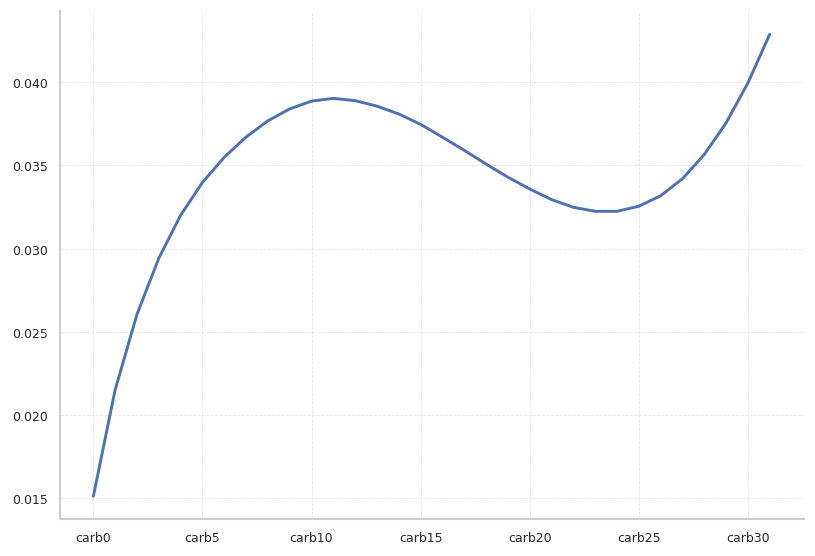

In [80]:
carb_col_train_average = carb_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(32,min_periods=1).mean().T
carb_col_test_average = carb_col_test.drop(columns=["p_num"]).T.rolling(32,min_periods=1).mean().T

#carb_col_train_average.clip(lower=0,upper=2.9,inplace=True)
#carb_col_test_average.clip(lower=0,upper=2.9,inplace=True)

carb_col_train_average["bg+1:00"] = df_train["bg+1:00"]
carb_col_train_average.corr()["bg+1:00"][:-1].plot()
plt.show()
carb_col_train_average.drop(columns=["bg+1:00"],inplace=True)

In [81]:
cols_carb = list(carb_col_train_average.columns)
new_cols = [x.replace("carb","carbs_av") for x in cols_carb]
carb_col_train_average.columns = new_cols
carb_col_test_average.columns = new_cols

In [82]:
carb_col_test_average.head()

,carbs_av0,carbs_av1,carbs_av2,carbs_av3,carbs_av4,carbs_av5,carbs_av6,carbs_av7,carbs_av8,carbs_av9,carbs_av10,carbs_av11,carbs_av12,carbs_av13,carbs_av14,carbs_av15,carbs_av16,carbs_av17,carbs_av18,carbs_av19,carbs_av20,carbs_av21,carbs_av22,carbs_av23,carbs_av24,carbs_av25,carbs_av26,carbs_av27,carbs_av28,carbs_av29,carbs_av30,carbs_av31
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
p01_8460,0.0,0.0,0.0,0.0,0.479579,0.399649,0.342556,0.299737,0.266433,0.23979,0.21799,0.199825,0.184453,0.171278,0.15986,0.149868,0.141053,0.133216,0.126205,0.119895,0.114185,0.108995,0.104256,0.099912,0.095916,0.092227,0.088811,0.194372,0.18767,0.181414,0.175562,0.170076
p01_8461,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
p01_8462,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
p01_8463,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [83]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(carb_col_test_average)
# #plt.yscale('log')
# plt.show()

#### Add to Dataset:

In [84]:
gc.collect()

3479

In [85]:
df_train.drop(cols_ins, axis=1, inplace=True)
df_test.drop(cols_ins, axis=1, inplace=True)

df_train.drop(cols_carb, axis=1, inplace=True)
df_test.drop(cols_carb, axis=1, inplace=True)

In [86]:
new_train = pd.concat([df_train,insulin_col_train_average,carb_col_train_average],ignore_index=False, axis=1)
new_test = pd.concat([df_test,insulin_col_train_average_test,carb_col_test_average],ignore_index=False, axis=1)
print(df_train.shape,new_train.shape)
print(df_test.shape,new_test.shape)

(5235699, 164) (5235699, 228)
(3644, 164) (3644, 228)


In [87]:
int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()

new_train[int_cols] = new_train[int_cols].astype("int32")
new_train[float_cols] = new_train[float_cols].astype("float32")
new_train[obj_cols] = new_train[obj_cols].astype("string")

new_test[int_cols] = new_test[int_cols].astype("int32")
new_test[float_cols] = new_test[float_cols].astype("float32")
new_test[obj_cols] = new_test[obj_cols].astype("string")

In [88]:
#new_train.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv')
#new_test.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv')

# df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv', index_col=0)
# df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv', index_col=0)

### 4.0 HR

In [89]:
#np.log(hr_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:]).corr().style.background_gradient(cmap='rocket')
hr_col_train.head()

,p_num,hr0,hr1,hr2,hr3,hr4,hr5,hr6,hr7,hr8,hr9,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22,hr23,hr24,hr25,hr26,hr27,hr28,hr29,hr30,hr31,bg+1:00
0,p01,60.400002,60.099998,60.000000,60.700001,60.400002,59.900002,59.400002,59.500000,60.099998,60.799999,60.099998,60.500000,59.700001,59.400002,59.000000,58.200001,58.400002,58.700001,58.400002,58.900002,59.099998,59.099998,59.400002,59.400002,59.700001,59.400002,59.599998,60.000000,60.500000,60.299999,59.500000,61.200001,12.800000
1,p01,69.000000,69.400002,69.000000,68.699997,68.900002,66.300003,65.500000,65.000000,63.200001,62.000000,62.400002,62.200001,62.099998,62.000000,62.599998,62.099998,61.400002,61.599998,62.500000,62.200001,62.099998,62.599998,63.000000,63.200001,64.099998,63.599998,63.799999,63.299999,63.700001,63.599998,63.200001,61.900002,17.200001
2,p01,69.400002,69.000000,68.699997,68.900002,66.300003,65.500000,65.000000,63.200001,62.000000,62.400002,62.200001,62.099998,62.000000,62.599998,62.099998,61.400002,61.599998,62.500000,62.200001,62.099998,62.599998,63.000000,63.200001,64.099998,63.599998,63.799999,63.299999,63.700001,63.599998,63.200001,61.900002,61.299999,17.500000
3,p01,69.000000,68.699997,68.900002,66.300003,65.500000,65.000000,63.200001,62.000000,62.400002,62.200001,62.099998,62.000000,62.599998,62.099998,61.400002,61.599998,62.500000,62.200001,62.099998,62.599998,63.000000,63.200001,64.099998,63.599998,63.799999,63.299999,63.700001,63.599998,63.200001,61.900002,61.299999,61.700001,17.900000
4,p01,68.699997,68.900002,66.300003,65.500000,65.000000,63.200001,62.000000,62.400002,62.200001,62.099998,62.000000,62.599998,62.099998,61.400002,61.599998,62.500000,62.200001,62.099998,62.599998,63.000000,63.200001,64.099998,63.599998,63.799999,63.299999,63.700001,63.599998,63.200001,61.900002,61.299999,61.700001,61.000000,18.200001


In [90]:
gc.collect()

0

In [91]:
all_hr_col = list(hr_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#hr_col_train[all_hr_col] = hr_col_train[all_hr_col].clip(lower=0,upper=150).values
#hr_col_train[all_hr_col] = hr_col_train[all_hr_col].clip(lower=0,upper=150).values

hr_col_train[all_hr_col] = np.log(hr_col_train[all_hr_col].values)
hr_col_test[all_hr_col] = np.log(hr_col_test[all_hr_col].values)

In [92]:
# all_hr_col = list(hr_col_train.drop(columns=["p_num","hour","minute","bg+1:00"]).columns)

# obs_index = set()

# for c in all_hr_col:
#   susp = hr_col_train[hr_col_train[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [93]:
# carb_col_train.loc[obs_index,:]

In [94]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(hr_col_train.drop(columns=["p_num","bg+1:00"]))
# #plt.yscale('log')
# plt.show()

In [95]:
hr_col_train.isna().sum().sum()

0

In [96]:
# for i in range(30,33,1):
#   hr_col_train_average = hr_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(hr_col_train_average.columns)
#   new_cols = [x.replace("hr","hr_av") for x in cols]

#   av_hr = pd.DataFrame(hr_col_train_average.values, columns=new_cols)
#   av_hr["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_hr.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [ ]:
#hr_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')
#hr_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"])# = np.log(hr_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"])).values
#hr_col_test.drop(columns=["p_num","hour",	"minute"])# = np.log(hr_col_test.drop(columns=["p_num","hour",	"minute"])).values

In [ ]:
# hr_col_train_average = hr_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(32,min_periods=1).mean().T
# hr_col_test_average = hr_col_test.drop(columns=["p_num"]).T.rolling(32,min_periods=1).mean().T
# hr_col_train_average["bg+1:00"] = df_train["bg+1:00"]
# cols = list(hr_col_train_average.columns)

In [97]:
#hr_col_train_average.corr()["bg+1:00"][:-1].plot()

#### Add to the Dataset

In [98]:
print(new_train.shape)
print(new_test.shape)

new_train.drop(all_hr_col, axis=1, inplace=True)
new_test.drop(all_hr_col, axis=1, inplace=True)
hr_col_train[all_hr_col]

# new_train = pd.concat([new_train,hr_col_train[all_hr_col]],ignore_index=False, axis=1)
# new_test = pd.concat([new_test,hr_col_test[all_hr_col]],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

(5235699, 228)
(3644, 228)
(5235699, 196)
(3644, 196)


In [102]:
gc.collect()

# int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
# float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
# obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()
# read_cols = {fl:np.float32 for fl in float_cols}

31

In [45]:
read_cols = {'activity0': np.float32, 'activity1': np.float32, 'activity2': np.float32, 'activity3': np.float32, 'activity4': np.float32, 'activity5': np.float32, 'activity6': np.float32, 'activity7': np.float32, 'activity8': np.float32, 'activity9': np.float32, 'activity10': np.float32, 'activity11': np.float32, 'activity12': np.float32, 'activity13': np.float32, 'activity14': np.float32, 'activity15': np.float32, 'activity16': np.float32, 'activity17': np.float32, 'activity18': np.float32, 'activity19': np.float32, 'activity20': np.float32, 'activity21': np.float32, 'activity22': np.float32, 'activity23': np.float32, 'activity24': np.float32, 'activity25': np.float32, 'activity26': np.float32, 'activity27': np.float32, 'activity28': np.float32, 'activity29': np.float32, 'activity30': np.float32,
              'activity31': np.float32, 'bg0': np.float32, 'bg1': np.float32, 'bg2': np.float32, 'bg3': np.float32, 'bg4': np.float32, 'bg5': np.float32, 'bg6': np.float32, 'bg7': np.float32, 'bg8': np.float32, 'bg9': np.float32, 'bg10': np.float32, 'bg11': np.float32, 'bg12': np.float32, 'bg13': np.float32, 'bg14': np.float32, 'bg15': np.float32, 'bg16': np.float32, 'bg17': np.float32, 'bg18': np.float32, 'bg19': np.float32, 'bg20': np.float32, 'bg21': np.float32, 'bg22': np.float32,
              'bg23': np.float32, 'bg24': np.float32,'bg25': np.float32, 'bg26': np.float32, 'bg27': np.float32, 'bg28': np.float32, 'bg29': np.float32, 'bg30': np.float32, 'bg31': np.float32, 'cals0': np.float32, 'cals1': np.float32, 'cals2': np.float32, 'cals3': np.float32, 'cals4': np.float32, 'cals5': np.float32, 'cals6': np.float32, 'cals7': np.float32, 'cals8': np.float32, 'cals9': np.float32, 'cals10': np.float32, 'cals11': np.float32, 'cals12': np.float32, 'cals13': np.float32,
              'cals14': np.float32, 'cals15': np.float32, 'cals16': np.float32, 'cals17': np.float32, 'cals18': np.float32, 'cals19': np.float32, 'cals20': np.float32, 'cals21': np.float32, 'cals22': np.float32, 'cals23': np.float32, 'cals24': np.float32, 'cals25': np.float32, 'cals26': np.float32, 'cals27': np.float32, 'cals28': np.float32, 'cals29': np.float32, 'cals30': np.float32, 'cals31': np.float32, 'steps0': np.float32, 'steps1': np.float32, 'steps2': np.float32, 'steps3': np.float32, 'steps4': np.float32,
              'steps5': np.float32, 'steps6': np.float32, 'steps7': np.float32, 'steps8': np.float32, 'steps9': np.float32, 'steps10': np.float32, 'steps11': np.float32, 'steps12': np.float32, 'steps13': np.float32, 'steps14': np.float32, 'steps15': np.float32, 'steps16': np.float32, 'steps17': np.float32, 'steps18': np.float32, 'steps19': np.float32, 'steps20': np.float32, 'steps21': np.float32, 'steps22': np.float32, 'steps23': np.float32, 'steps24': np.float32,
              'steps25': np.float32, 'steps26': np.float32, 'steps27': np.float32, 'steps28': np.float32, 'steps29': np.float32, 'steps30': np.float32, 'steps31': np.float32, 'bg+1:00': np.float32, 'insulin_av0': np.float32, 'insulin_av1': np.float32, 'insulin_av2': np.float32, 'insulin_av3': np.float32, 'insulin_av4': np.float32, 'insulin_av5': np.float32, 'insulin_av6': np.float32, 'insulin_av7': np.float32, 'insulin_av8': np.float32, 'insulin_av9': np.float32,
              'insulin_av10': np.float32, 'insulin_av11': np.float32, 'insulin_av12': np.float32, 'insulin_av13': np.float32, 'insulin_av14': np.float32, 'insulin_av15': np.float32, 'insulin_av16': np.float32, 'insulin_av17': np.float32, 'insulin_av18': np.float32, 'insulin_av19': np.float32, 'insulin_av20': np.float32, 'insulin_av21': np.float32, 'insulin_av22': np.float32, 'insulin_av23': np.float32, 'insulin_av24': np.float32, 'insulin_av25': np.float32, 'insulin_av26': np.float32, 'insulin_av27': np.float32, 'insulin_av28': np.float32, 'insulin_av29': np.float32, 'insulin_av30': np.float32, 'insulin_av31': np.float32,
              'carbs_av0': np.float32, 'carbs_av1': np.float32, 'carbs_av2': np.float32, 'carbs_av3': np.float32, 'carbs_av4': np.float32, 'carbs_av5': np.float32, 'carbs_av6': np.float32, 'carbs_av7': np.float32, 'carbs_av8': np.float32, 'carbs_av9': np.float32, 'carbs_av10': np.float32, 'carbs_av11': np.float32, 'carbs_av12': np.float32, 'carbs_av13': np.float32, 'carbs_av14': np.float32,
              'carbs_av15': np.float32, 'carbs_av16': np.float32, 'carbs_av17': np.float32, 'carbs_av18': np.float32, 'carbs_av19': np.float32, 'carbs_av20': np.float32, 'carbs_av21': np.float32, 'carbs_av22': np.float32, 'carbs_av23': np.float32, 'carbs_av24': np.float32, 'carbs_av25': np.float32,
              'carbs_av26': np.float32, 'carbs_av27': np.float32, 'carbs_av28': np.float32, 'carbs_av29': np.float32, 'carbs_av30': np.float32, 'carbs_av31': np.float32}

In [ ]:
# new_train.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv')
# new_test.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv')

new_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv', index_col=0,
                        dtype=read_cols
                        )
new_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv', index_col=0)

In [120]:
int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()

new_train[int_cols] = new_train[int_cols].astype("int32")
new_train[float_cols] = new_train[float_cols].astype("float32")
new_train[obj_cols] = new_train[obj_cols].astype("string")

new_test[int_cols] = new_test[int_cols].astype("int32")
new_test[float_cols] = new_test[float_cols].astype("float32")
new_test[obj_cols] = new_test[obj_cols].astype("string")

In [121]:
gc.collect()

8

### 5.0 STEPS:

In [ ]:
#step_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')

In [104]:
all_steps_col = list(step_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values
#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values

step_col_train[all_steps_col] = np.log1p(step_col_train[all_steps_col].values)
step_col_test[all_steps_col] = np.log1p(step_col_test[all_steps_col].values)

In [105]:
# all_steps_col = list(step_col_train.drop(columns=["p_num","bg+1:00"]).columns)

# obs_index = set()

# for c in all_steps_col:
#   susp = step_col_train[step_col_train[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [ ]:
# carb_col_train.loc[obs_index,:]

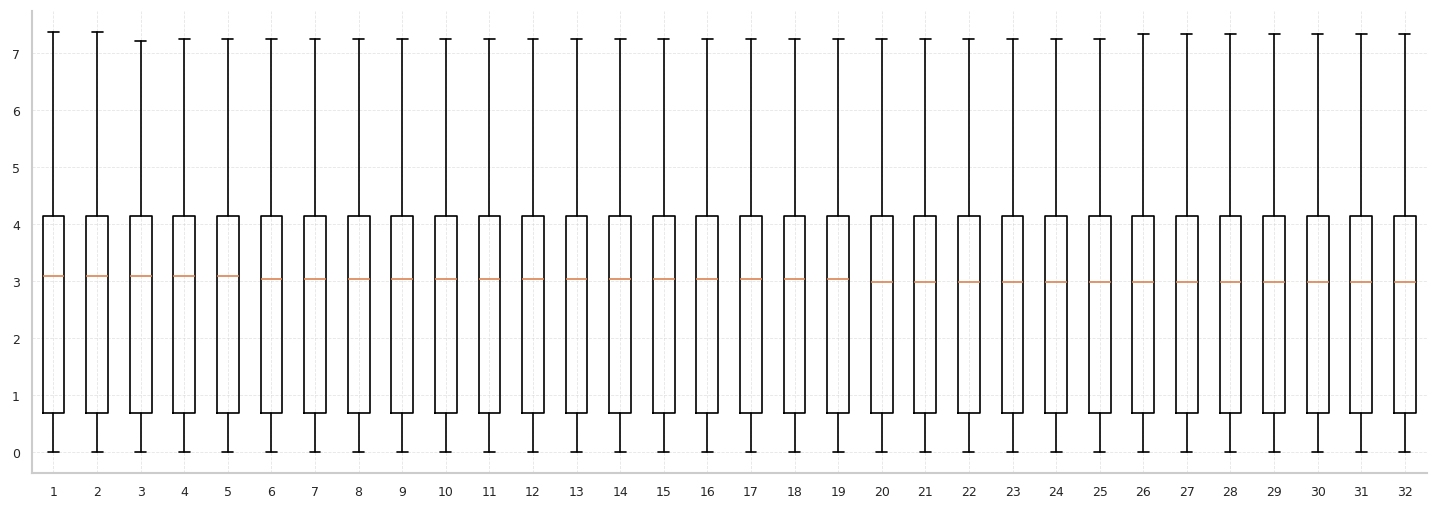

In [106]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(step_col_train.drop(columns=["p_num","bg+1:00"]))
# #plt.yscale('log')
# plt.show()

In [107]:
# for i in range(25,33,1):
#   step_col_train_average = step_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(step_col_train_average.columns)
#   new_cols = [x.replace("step","step_av") for x in cols]

#   av_step = pd.DataFrame(step_col_train_average.values, columns=new_cols)
#   av_step["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_step.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [110]:
step_col_train_average = step_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(32,min_periods=1).mean().T
step_col_test_average = step_col_test.drop(columns=["p_num",]).T.rolling(32,min_periods=1).mean().T
step_col_train_average["bg+1:00"] = df_train["bg+1:00"]

#step_col_train_average.clip(lower=0,upper=650.0,inplace=True)
#step_col_test_average.clip(lower=0,upper=650.0,inplace=True)

cols_orig = list(step_col_train_average.drop(columns=["bg+1:00"]).columns)

<Axes: >

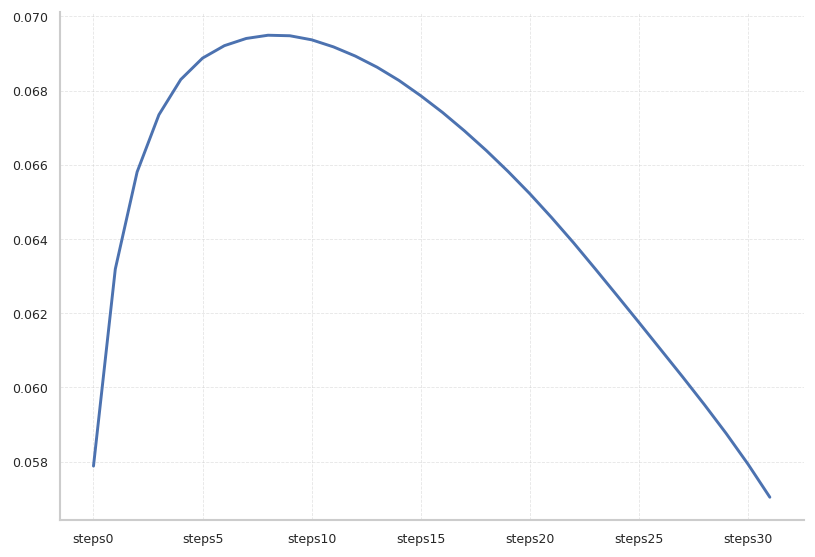

In [111]:
step_col_train_average.corr()["bg+1:00"][:-1].plot()

In [112]:
step_col_train_average.drop(columns=["bg+1:00"],inplace=True)

new_cols = [x.replace("steps","steps_av") for x in cols_orig]
step_col_train_average.columns = new_cols
step_col_test_average.columns = new_cols

In [114]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(step_col_train_average)
# #plt.yscale('log')
# plt.show()

#### Add to Dataset:

In [122]:
print(new_train.shape)
print(new_test.shape)

# new_train.drop(cols_orig, axis=1, inplace=True)
# new_test.drop(cols_orig, axis=1, inplace=True)

#new_train = pd.concat([new_train,step_col_train_average],ignore_index=False, axis=1)
#new_test = pd.concat([new_test,step_col_test_average],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

#del step_col_train_average, step_col_test_average, hr_col_train, hr_col_test, step_col_train, step_col_test
gc.collect()

(5235699, 164)
(3644, 164)
(5235699, 164)
(3644, 164)


0

### 6.0 CALS:

In [126]:
cal_col_train = df_train.filter(regex='cal|p_num|bg+1:00')
cal_col_test = df_test.filter(regex='cal|p_num|bg+1:00')
cal_col_train["bg+1:00"] = df_train["bg+1:00"]

In [127]:
# cal_col_train.iloc[:,1:].corr().style.background_gradient(cmap='rocket')
cal_col_train.head()

,p_num,cals0,cals1,cals2,cals3,cals4,cals5,cals6,cals7,cals8,cals9,cals10,cals11,cals12,cals13,cals14,cals15,cals16,cals17,cals18,cals19,cals20,cals21,cals22,cals23,cals24,cals25,cals26,cals27,cals28,cals29,cals30,cals31,bg+1:00
0,p01,5.30,5.19,5.06,4.91,4.90,4.88,4.82,4.85,4.83,4.81,4.86,4.90,4.85,4.86,4.85,4.88,4.84,4.82,4.86,4.88,5.34,5.04,4.91,4.90,4.83,4.97,4.84,4.80,4.83,4.89,4.85,5.06,12.800000
1,p01,9.05,9.15,8.05,8.04,8.25,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.08,5.76,5.35,5.39,5.17,5.28,5.10,5.15,5.31,5.10,5.04,5.15,5.35,4.95,17.200001
2,p01,9.15,8.05,8.04,8.25,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.08,5.76,5.35,5.39,5.17,5.28,5.10,5.15,5.31,5.10,5.04,5.15,5.35,4.95,5.10,17.500000
3,p01,8.05,8.04,8.25,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.08,5.76,5.35,5.39,5.17,5.28,5.10,5.15,5.31,5.10,5.04,5.15,5.35,4.95,5.10,5.15,17.900000
4,p01,8.04,8.25,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.08,5.76,5.35,5.39,5.17,5.28,5.10,5.15,5.31,5.10,5.04,5.15,5.35,4.95,5.10,5.15,4.98,18.200001


In [128]:
all_cal_col = list(cal_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values
#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values

cal_col_train[all_cal_col] = np.log1p(cal_col_train[all_cal_col].values)
cal_col_test[all_cal_col] = np.log1p(cal_col_test[all_cal_col].values)

cal_col_train.loc[:,all_cal_col].min().min()

0.00995033048093319

In [129]:
# all_steps_col = list(step_col_train.drop(columns=["p_num","hour","minute","bg+1:00"]).columns)

# obs_index = set()

# for c in all_car_col:
#   susp = step_col_train[step_col_train[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [130]:
# carb_col_train.loc[obs_index,:]

In [132]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(cal_col_train.drop(columns=["p_num","bg+1:00"]))
# #plt.yscale('log')
# plt.show()

In [133]:
for i in range(1,10,1):
  cal_col_train_average = cal_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
  cols = list(cal_col_train_average.columns)
  new_cols = [x.replace("cal","cal_av") for x in cols]

  av_cal = pd.DataFrame(cal_col_train_average.values, columns=new_cols)
  av_cal["bg+1:00"] = df_train["bg+1:00"].values
  max_corr = av_cal.corr()["bg+1:00"][:-1].min()

  print(f"Roll {i}: {max_corr}")

Roll 1: -0.0987301110288961
Roll 2: -0.10057205297614427
Roll 3: -0.10134029926538256
Roll 4: -0.10170640405698363
Roll 5: -0.10184906688703202
Roll 6: -0.10184111748844421
Roll 7: -0.10173846042144395
Roll 8: -0.10156523926027582
Roll 9: -0.10133961621506486


In [ ]:
#-0.079615 - 0
#-0.085073 - 6
#-0.085243 - 7
#-0.085348 - 8
#-0.085443 - 9 <-
#-0.085423 - 10

In [134]:
cal_col_train_average = cal_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(5,min_periods=1).mean().T
cal_col_test_average = cal_col_test.drop(columns=["p_num"]).T.rolling(5,min_periods=1).mean().T
cal_col_train_average["bg+1:00"] = df_train["bg+1:00"]
cols_cals = list(cal_col_train_average.drop(columns=["bg+1:00"]).columns)

#cal_col_train_average.clip(lower=0,upper=75.0,inplace=True)
#cal_col_test_average.clip(lower=0,upper=75.0,inplace=True)

In [137]:
#cal_col_train_average.corr().style.background_gradient(cmap='rocket')
#cal_col_train_average.corr()["bg+1:00"][:-1].plot()

In [138]:
cal_col_train_average.drop(columns=["bg+1:00"],inplace=True)

new_cols = [x.replace("cals","cals_av") for x in cols_cals]
cal_col_train_average.columns = new_cols
cal_col_test_average.columns = new_cols

In [140]:
# fig, ax =  plt.subplots(figsize=(15,5))
# ax.boxplot(cal_col_train_average)
# #plt.yscale('log')
# plt.show()

#### Add to Dataset:

In [141]:
print(new_train.shape)
print(new_test.shape)

new_train.drop(cols_cals, axis=1, inplace=True)
new_test.drop(cols_cals, axis=1, inplace=True)

new_train = pd.concat([new_train,cal_col_train_average],ignore_index=False, axis=1)
new_test = pd.concat([new_test,cal_col_test_average],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

(5235699, 164)
(3644, 164)
(5235699, 164)
(3644, 164)


### 7.0 ACTIVITY

In [143]:
del cal_col_train_average, cal_col_test_average
gc.collect()

22074

<Axes: >

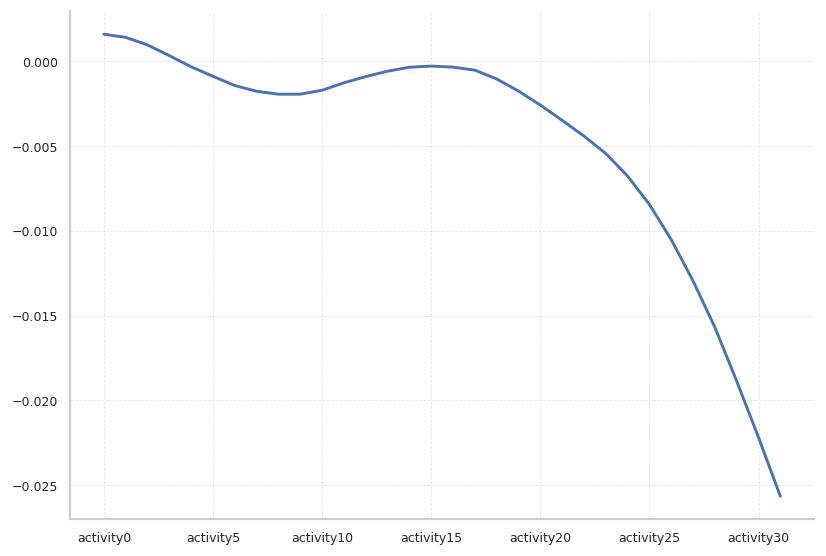

In [142]:
act_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()#.style.background_gradient(cmap='rocket')

In [144]:
del act_col_train, act_col_test
gc.collect()

56

In [147]:
col_act = list(new_train.filter(regex='activity').columns)

In [148]:
new_train.drop(col_act, axis=1, inplace=True)
new_test.drop(col_act, axis=1, inplace=True)

In [150]:
gc.collect()
new_train.shape,new_test.shape

((5235699, 132), (3644, 132))

## Feature Generation:

#### 1.0 Net Intake: Carb-Cals

Div 6.7: 0.13041174178382123

Div 6.8: 0.13042215128319495

Div 6.9: 0.13042387176446235

Div 7.0: 0.13041741921890446

Div 7.1: 0.13040328344423044

In [153]:
cols = list(new_train.filter(regex="cals").columns)

In [157]:
for i in range(38,50):
  net_intake = carb_col_train_average.values-new_train.filter(regex="cals").div(i/10).values
  new_cols = [x.replace("cals","intake") for x in cols]

  net_intake = pd.DataFrame(net_intake, columns=new_cols)
  net_intake["bg+1:00"] = df_train["bg+1:00"].values
  max_corr = net_intake.corr()["bg+1:00"][:-1].max()

  print(f"Div {i/10}: {max_corr}")

Div 3.8: 0.12040181533720871
Div 3.9: 0.12045987270292251
Div 4.0: 0.12049853459568204
Div 4.1: 0.120518283196034
Div 4.2: 0.12051961397737486
Div 4.3: 0.12050303380731506
Div 4.4: 0.12046905909633801
Div 4.5: 0.12041821400281406
Div 4.6: 0.1203510287003137
Div 4.7: 0.12026803771532352
Div 4.8: 0.12016977833867318
Div 4.9: 0.12005678911625416


Corr Max: 0.12051961397737486


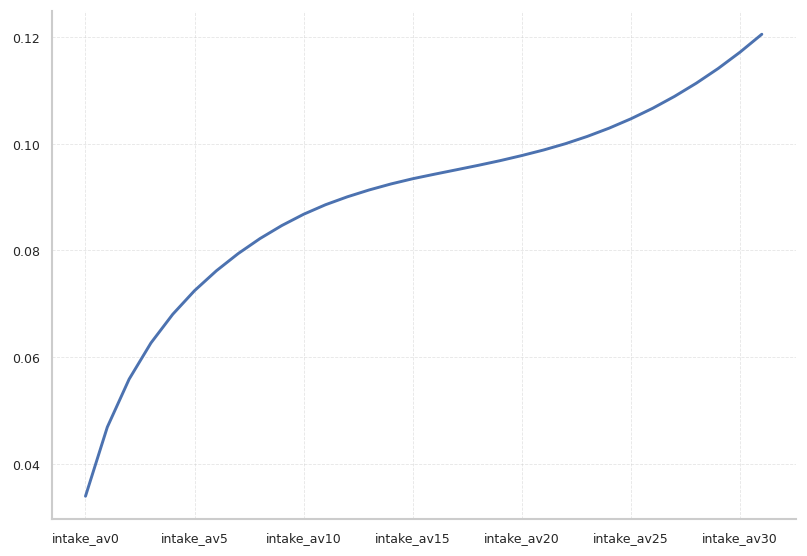

In [160]:
net_intake = carb_col_train_average.values-new_train.filter(regex="cals").div(4.2).values
net_intake_test = carb_col_test_average.values-new_test.filter(regex="cals").div(4.2).values
new_cols = [x.replace("cals","intake") for x in cols]

net_intake = pd.DataFrame(net_intake, columns=new_cols, index=carb_col_train_average.index)
net_intake_test = pd.DataFrame(net_intake_test, columns=new_cols, index=carb_col_test_average.index)
net_intake["bg+1:00"] = df_train["bg+1:00"].values
max_corr = net_intake.corr()["bg+1:00"][:-1].max()

print(f"Corr Max: {max_corr}")
net_intake.corr()["bg+1:00"][:-1].plot()
plt.show()
net_intake.drop(columns=["bg+1:00"],inplace=True)

In [161]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,net_intake],ignore_index=False, axis=1)
new_test = pd.concat([new_test,net_intake_test],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

(5235699, 132)
(3644, 132)
(5235699, 164)
(3644, 164)


In [162]:
int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()

new_train[int_cols] = new_train[int_cols].astype("int32")
new_train[float_cols] = new_train[float_cols].astype("float32")
new_train[obj_cols] = new_train[obj_cols].astype("string")

new_test[int_cols] = new_test[int_cols].astype("int32")
new_test[float_cols] = new_test[float_cols].astype("float32")
new_test[obj_cols] = new_test[obj_cols].astype("string")

In [ ]:
#new_train.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv')
#new_test.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv')

# new_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_new_v0.csv', index_col=0)
# new_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_new_v0.csv', index_col=0)

#### 1.0 Net Dampner: Insuline-Cals

Div 63: 0.21467743225877814

Div 64: 0.21472359148484518

Div 65: 0.21475169624048407

Div 66: 0.21476292342196002

Div 67: 0.21475838314463036

Div 68: 0.2147391220452472

Div 69: 0.21470612648920334

Div 70: 0.21466032567432106

In [164]:
insulin_col_train_average.max().max(),new_train.filter(regex="cals").max().max()

(1.0, 4.763028144836426)

In [ ]:
for i in range(1,25):
  net_brakes = insulin_col_train_average.values-new_train.filter(regex="cals").div(i).values
  cols = list(insulin_col_train_average.columns)
  new_cols = [x.replace("insuline","brake") for x in cols]

  net_brakes = pd.DataFrame(net_brakes, columns=new_cols, index=insulin_col_train_average.index)
  net_brakes["bg+1:00"] = df_train["bg+1:00"].values
  max_corr = net_brakes.corr()["bg+1:00"][:-1].max()

  print(f"Div {i}: {max_corr}")

    Div 1: 0.13139213261096733
    Div 2: 0.15850628899723718
    Div 3: 0.1819656981753301
    Div 4: 0.2011799564958317
    Div 5: 0.21618377763197547
    Div 6: 0.2274396593590342
    Div 7: 0.23560148721384905
    Div 8: 0.2413380823931608
    Div 9: 0.24523889128825221
    Div 10: 0.24778189703399067
    Div 11: 0.24933601292850277
    Div 12: 0.25017765428766303
    Div 13: 0.2505103469288282
    Div 14: 0.2504825334380493
    Div 15: 0.2502019139471403
    Div 16: 0.24974646906202883
    Div 17: 0.24917262279636618

In [170]:
#del net_brakes
#del net_intake
gc.collect()

90

Corr Max: 0.2505103469288282


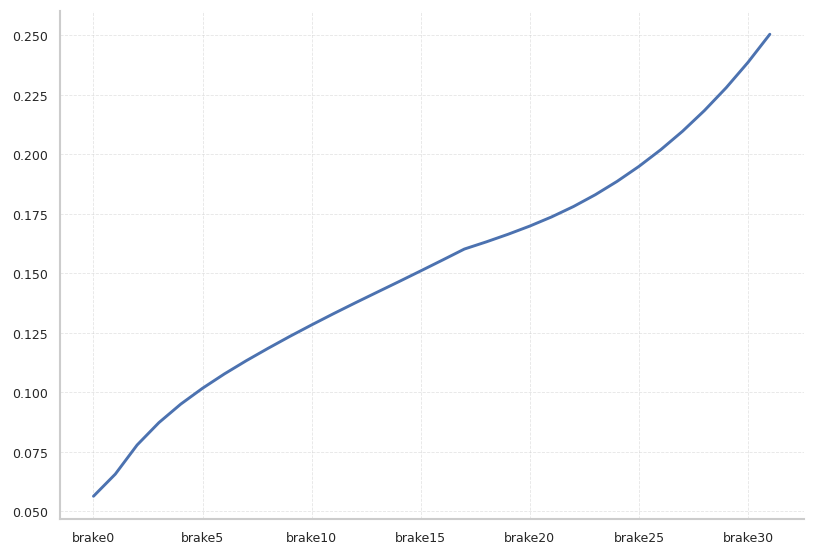

In [171]:
net_brakes = insulin_col_train_average.values-new_train.filter(regex="cals").div(13).values
net_brakes_test = insulin_col_train_average_test.values-new_test.filter(regex="cals").div(13).values
cols = list(insulin_col_train_average.columns)
new_cols = [x.replace("insulin_av","brake") for x in cols]

net_brakes = pd.DataFrame(net_brakes, columns=new_cols, index=carb_col_train_average.index)
net_brakes_test = pd.DataFrame(net_brakes_test, columns=new_cols, index=carb_col_test_average.index)
net_brakes["bg+1:00"] = df_train["bg+1:00"].values
max_corr = net_brakes.corr()["bg+1:00"][:-1].max()

print(f"Corr Max: {max_corr}")
net_brakes.corr()["bg+1:00"][:-1].plot()
plt.show()
net_brakes.drop(columns=["bg+1:00"],inplace=True)

In [172]:
# display(net_brakes.head())
# display(net_brakes_test.head())

In [173]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,net_brakes],ignore_index=False, axis=1)
new_test = pd.concat([new_test,net_brakes_test],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

(5235699, 164)
(3644, 164)
(5235699, 196)
(3644, 196)


In [174]:
int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()

new_train[int_cols] = new_train[int_cols].astype("int32")
new_train[float_cols] = new_train[float_cols].astype("float32")
new_train[obj_cols] = new_train[obj_cols].astype("string")

new_test[int_cols] = new_test[int_cols].astype("int32")
new_test[float_cols] = new_test[float_cols].astype("float32")
new_test[obj_cols] = new_test[obj_cols].astype("string")

## Dataset Cleaning:

All the Data that have been replaced by rolling average are now removed:

In [184]:
new_train["bg+1:00"] = df_train["bg+1:00"].values
new_test["bg+1:00"] = df_test["bg+1:00"].values

In [185]:
gc.collect()

0

In [ ]:
# new_train.drop(columns=insulin_col_train.iloc[:,1:-1].columns, inplace=True)
# new_test.drop(columns=insulin_col_train.iloc[:,1:-1].columns, inplace=True)

# new_train.drop(columns=step_col_train.iloc[:,1:-1].columns, inplace=True)
# new_test.drop(columns=step_col_train.iloc[:,1:-1].columns, inplace=True)

# new_train.drop(columns=carb_col_train.iloc[:,1:-1].columns, inplace=True)
# new_test.drop(columns=carb_col_train.iloc[:,1:-1].columns, inplace=True)

# new_train.drop(columns=cal_col_train.iloc[:,1:-1].columns, inplace=True)
# new_test.drop(columns=cal_col_train.iloc[:,1:-1].columns, inplace=True)

In [186]:
new_train.shape,new_test.shape

((5235699, 196), (3644, 196))

In [189]:
new_train.drop(columns=["p_num","bg+1:00","minute","hour"]).shape[1]/32

6.0

## Save to Excel:

In [ ]:
#new_train.reset_index(inplace=True)
#new_test.reset_index(inplace=True)
#new_train.head()

In [190]:
del df_train,df_test
gc.collect()

0

In [ ]:
#new_train = pd.read_csv("temp_train.csv")
#new_test = pd.read_csv("temp_test.csv")

In [207]:
# pnum_df_train = new_train.filter(regex='p_num')
# pnum_df_test = new_test.filter(regex='p_num')

# act_df_train = new_train.filter(regex='activity')
# act_df_test = new_test.filter(regex='activity')

# bg_df_train = new_train.filter(regex='bg').drop(columns=["bg+1:00"])
# bg_df_test = new_test.filter(regex='bg').drop(columns=["bg+1:00"])

# ins_df_train = new_train.filter(regex='insulin_av')
# ins_df_test = new_test.filter(regex='insulin_av')

# cals_df_train = new_train.filter(regex='cals_av')
# cals_df_test = new_test.filter(regex='cals_av')

# brake_df_train = new_train.filter(regex='brake')
# brake_df_test = new_test.filter(regex='brake')

# car_df_train = new_train.filter(regex='carbs_av')
# car_df_test = new_test.filter(regex='carbs_av')

# hr_df_train = new_train.filter(regex='hr')
# hr_df_test = new_test.filter(regex='hr')

# intake_df_train = new_train.filter(regex='intake')
# intake_df_test = new_test.filter(regex='intake')

# step_df_train = new_train.filter(regex='steps_av')
# step_df_test = new_test.filter(regex='steps_av')

# target_df_train = new_train["bg+1:00"]
# target_df_test = new_test["bg+1:00"]

# print(new_train.shape)
# print(new_test.shape)
# new_train = pd.concat([pnum_df_train,act_df_train,bg_df_train,ins_df_train,cals_df_train,brake_df_train,car_df_train,hr_df_train,intake_df_train,step_df_train,target_df_train],axis=1)
# new_test = pd.concat([pnum_df_test,act_df_test,bg_df_test,ins_df_test,cals_df_test,brake_df_test,car_df_test,hr_df_test,intake_df_test,step_df_test,target_df_test],axis=1)
print(new_train.shape)
print(new_test.shape)

(5235699, 196)
(3644, 196)


In [191]:
int_cols = new_train.select_dtypes(include=['int']).columns.tolist()
float_cols = new_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = new_train.select_dtypes(include=['object']).columns.tolist()

new_train[int_cols] = new_train[int_cols].astype("int32")
new_train[float_cols] = new_train[float_cols].astype("float32")
new_train[obj_cols] = new_train[obj_cols].astype("string")

new_test[int_cols] = new_test[int_cols].astype("int32")
new_test[float_cols] = new_test[float_cols].astype("float32")
new_test[obj_cols] = new_test[obj_cols].astype("string")

In [229]:
#del bg_col_train, bg_col_test, carb_col_train, carb_col_train_average, carb_col_test, carb_col_test_average
#del insulin_col_train, insulin_col_train_average, insulin_col_test,
#del insulin_col_train_average_test
#del cal_col_train, av_cal, net_brakes

gc.collect()

12

In [ ]:
new_train.to_csv("final_train.csv",index=False)
new_test.to_csv("final_test.csv",index=False)

#new_train = pd.read_csv("final_train.csv")
#new_test = pd.read_csv("final_test.csv")

In [ ]:
carb_col_train_average


In [ ]:
new_train.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,9.6,9.6,9.6,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,...,-3.578139,-3.540208,-3.542278,-3.530222,-3.502455,-3.456227,-3.408655,-3.352652,-3.285725,-3.227152,-3.162034,-3.120608,-3.075372,-3.045007,-3.041485,-3.028584,-3.022669,3.496508,3.751920,3.837058,3.834954,3.850368,3.850331,3.790853,3.768361,3.711665,3.687072,3.609449,3.491763,3.392184,3.333095,3.286826,3.246341,3.150052,3.052066,3.000875,2.948127,2.912369,2.903082,2.824627,2.793578,2.797449,2.764698,2.702991,2.688691,2.595977,2.620518,2.648776,2.652645,15.4
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,...,-3.530222,-3.502455,-3.456227,-3.407090,-3.351087,-3.284160,-3.225587,-3.160469,-3.119043,-3.077658,-3.051389,-3.049633,-3.036732,-3.030816,-3.025006,-3.036163,-3.026980,3.871201,3.891612,3.877791,3.758642,3.723618,3.646031,3.628935,3.529470,3.381443,3.263021,3.199560,3.158601,3.118636,3.010836,2.902533,2.851090,2.797844,2.764476,2.761506,2.678362,2.649842,2.660775,2.629694,2.565899,2.551152,2.527873,2.553466,2.587146,2.593541,2.592588,2.553675,2.508204,17.2
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,9.2,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,...,-3.407823,-3.351819,-3.284892,-3.227701,-3.162583,-3.120776,-3.077105,-3.046741,-3.043219,-3.028584,-3.022669,-3.013221,-3.026665,-3.021576,-3.013941,-3.016659,-3.013886,3.433987,3.522453,3.434334,3.457341,3.332515,3.143300,2.991320,2.938024,2.912471,2.885130,2.769158,2.653919,2.599457,2.552775,2.521220,2.532896,2.448527,2.420604,2.442320,2.417499,2.354695,2.352327,2.250052,2.288718,2.337030,2.348646,2.350470,2.316036,2.274055,2.234874,2.198220,2.129526,18.2
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8.7,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,...,-3.195398,-3.140354,-3.105821,-3.066439,-3.041009,-3.036579,-3.021342,-3.015417,-3.005954,-3.018981,-3.012478,-3.007066,-3.012088,-3.009775,-3.005153,-2.993044,-2.989735,3.555348,3.163968,2.876841,2.706937,2.678539,2.671959,2.667259,2.535031,2.407394,2.305284,2.272613,2.256516,2.291249,2.127588,2.132231,2.179615,2.146075,2.087883,2.099183,1.994224,2.057937,2.120485,2.148837,2.159214,2.128298,2.073100,2.037007,2.003493,1.934407,1.893032,1.831966,1.774717,18.4
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4,8.4,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,...,-3.069898,-3.043214,-3.039218,-3.020827,-3.012643,-3.004109,-3.016717,-3.010214,-3.004793,-3.011664,-3.009347,-3.003353,-2.987035,-2.986565,-2.995982,-3.000914,-3.010518,2.197225,2

In [ ]:
new_test.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,13.7,13.8,13.8,13.9,14.1,14.4,14.6,14.4,...,-2.934512,-2.934512,-2.939260,-2.939260,-2.934512,-2.934512,-2.934512,-2.939260,-2.939260,-2.944009,-2.944009,-2.944009,-2.944009,-2.939260,-2.934512,-2.934512,-2.989119,1.098612,0.549306,0.597253,0.621227,0.496981,0.414151,0.511931,0.447940,0.398169,0.578074,0.525522,0.481729,0.444673,0.412910,0.504834,0.541945,0.574690,0.632176,0.598903,0.666254,0.634527,0.605685,0.609488,0.690966,0.734997,0.706728,0.706225,0.681003,0.657520,0.672223,0.650538,0.673531,NaN
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,6.6,6.1,5.7,5.4,5.0,4.8,4.6,4.4,...,-4.192440,-4.208452,-4.163563,-4.018333,-4.088591,-4.054094,-3.968798,-3.991841,-3.849702,-3.904638,-3.936774,-4.064059,-3.640718,-3.808380,-4.231474,-4.473468,-4.697565,6.204558,6.206574,5.358903,5.091792,4.982093,4.778611,4.690078,4.511080,4.310744,4.219789,4.154036,4.082520,4.079484,3.981524,3.958595,3.921639,3.907947,3.871844,3.789252,3.812214,3.802628,3.718232,3.716956,3.562083,3.560654,3.603069,3.659836,3.711048,3.790702,3.874554,3.941017,4.014064,NaN
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.1,4.9,4.7,...,-4.206451,-4.173119,-3.988898,-3.599300,-3.281106,-3.388110,-3.618432,-3.892539,-4.202972,-4.366246,-4.716735,-4.781506,-4.510655,-4.236547,-4.033225,-4.210156,-3.972670,4.234107,4.332462,4.318461,4.379933,4.513917,4.655927,4.832852,5.027735,5.150104,5.110452,4.892052,4.828309,4.924235,4.999567,4.666263,4.567811,4.472319,4.223857,4.001548,3.936874,3.956251,4.032548,4.100469,4.158493,4.177152,4.254582,4.235437,4.175777,4.114470,4.088395,4.138736,4.142166,NaN
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,3.4,3.3,3.4,3.6,3.7,4.2,4.6,5.1,...,-2.948520,-2.948520,-2.934512,-2.929763,-2.934512,-2.939260,-2.939260,-2.939260,-2.939260,-2.939260,-2.943929,-2.943929,-2.948677,-2.948677,-2.948677,-2.953426,-2.944009,0.000000,1.354025,1.439163,1.079372,1.185385,1.103346,0.945725,0.827509,0.735564,0.910498,1.004626,1.178494,1.264963,1.174608,1.096301,1.027782,0.967325,0.913584,0.865501,0.942121,1.032173,1.016762,1.032829,1.056854,1.042306,1.002217,1.042115,1.004896,1.063626,1.051276,1.039724,1.007232,NaN
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,3.7,3.4,3.3,3.2,3.1,3.0,3.0,2.9,...,-2.987501,-2.987501,-2.929763,-2.929763,-2.934512,-2.934512,-2.948520,-3.133291,-3.133291,-3.133291,-3.128542,-3.133291,-3.119282,-2.934512,-2.934512,-2.934512,-2.934512,0.00

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_test.csv", index_col=0)
df_test.head()

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,...,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,hour,minute,obv_n
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,9.2,9.2,9.5,9.9,10.2,10.2,10.3,10.3,10.3,10.2,10.2,10.7,11.2,11.7,12.3,12.9,13.5,14.1,14.7,15.3,15.2,15.1,15.0,14.8,14.6,14.4,14.1,13.9,13.6,13.3,12.9,12.6,12.4,12.1,11.9,11.7,11.6,11.4,11.6,11.7,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,45,8459.0
p01_8460,p01,9.9,9.9,9.9,9.7,9.6,9.4,9.3,9.2,9.1,8.8,8.6,8.3,8.1,7.9,7.7,7.7,7.8,7.8,7.8,7.7,7.7,7.5,7.3,7.1,7.1,7.1,7.1,7.0,6.8,6.7,6.7,6.6,6.6,6.7,6.8,6.9,7.5,8.0,8.6,9.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,11,25,8460.0
p01_8461,p01,5.5,5.5,5.5,5.5,5.5,5.4,5.3,5.2,5.2,5.2,5.2,5.2,5.2,5.1,5.1,5.1,5.1,5.1,5.0,4.8,4.7,4.6,4.5,4.4,4.5,4.7,4.8,5.2,5.7,6.1,6.4,6.6,6.9,6.7,6.5,6.3,5.9,5.6,5.2,5.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,45,8461.0
p01_8462,p01,3.4,3.4,3.6,3.7,3.9,4.2,4.4,4.7,4.5,4.3,4.1,3.9,3.7,3.5,3.6,3.8,3.9,4.0,4.2,4.3,4.4,4.5,4.6,4.3,4.1,3.8,3.6,3.3,3.1,3.3,3.4,3.6,3.8,4.0,4.2,4.2,4.2,4.2,4.2,4.1,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,30,8462.0
p01_8463,p01,8.3,8.3,8.3,8.9,9.4,10.0,10.7,11.5,12.2,12.4,12.6,12.8,12.8,12.8,12.8,12.6,12.4,12.2,11.9,11.7,11.4,11.6,11.9,12.1,12.0,11.9,11.8,11.4,11.1,10.7,10.3,10.0,9.6,9.4,9.1,8.9,8.7,8.6,8.4,8.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,20,8463.0


In [ ]:
new_test.index = df_test.index
new_test.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,13.7,13.8,13.8,13.9,14.1,14.4,14.6,14.4,...,-2.934512,-2.934512,-2.939260,-2.939260,-2.934512,-2.934512,-2.934512,-2.939260,-2.939260,-2.944009,-2.944009,-2.944009,-2.944009,-2.939260,-2.934512,-2.934512,-2.989119,1.098612,0.549306,0.597253,0.621227,0.496981,0.414151,0.511931,0.447940,0.398169,0.578074,0.525522,0.481729,0.444673,0.412910,0.504834,0.541945,0.574690,0.632176,0.598903,0.666254,0.634527,0.605685,0.609488,0.690966,0.734997,0.706728,0.706225,0.681003,0.657520,0.672223,0.650538,0.673531,NaN
p01_8460,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,6.6,6.1,5.7,5.4,5.0,4.8,4.6,4.4,...,-4.192440,-4.208452,-4.163563,-4.018333,-4.088591,-4.054094,-3.968798,-3.991841,-3.849702,-3.904638,-3.936774,-4.064059,-3.640718,-3.808380,-4.231474,-4.473468,-4.697565,6.204558,6.206574,5.358903,5.091792,4.982093,4.778611,4.690078,4.511080,4.310744,4.219789,4.154036,4.082520,4.079484,3.981524,3.958595,3.921639,3.907947,3.871844,3.789252,3.812214,3.802628,3.718232,3.716956,3.562083,3.560654,3.603069,3.659836,3.711048,3.790702,3.874554,3.941017,4.014064,NaN
p01_8461,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.1,4.9,4.7,...,-4.206451,-4.173119,-3.988898,-3.599300,-3.281106,-3.388110,-3.618432,-3.892539,-4.202972,-4.366246,-4.716735,-4.781506,-4.510655,-4.236547,-4.033225,-4.210156,-3.972670,4.234107,4.332462,4.318461,4.379933,4.513917,4.655927,4.832852,5.027735,5.150104,5.110452,4.892052,4.828309,4.924235,4.999567,4.666263,4.567811,4.472319,4.223857,4.001548,3.936874,3.956251,4.032548,4.100469,4.158493,4.177152,4.254582,4.235437,4.175777,4.114470,4.088395,4.138736,4.142166,NaN
p01_8462,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,3.4,3.3,3.4,3.6,3.7,4.2,4.6,5.1,...,-2.948520,-2.948520,-2.934512,-2.929763,-2.934512,-2.939260,-2.939260,-2.939260,-2.939260,-2.939260,-2.943929,-2.943929,-2.948677,-2.948677,-2.948677,-2.953426,-2.944009,0.000000,1.354025,1.439163,1.079372,1.185385,1.103346,0.945725,0.827509,0.735564,0.910498,1.004626,1.178494,1.264963,1.174608,1.096301,1.027782,0.967325,0.913584,0.865501,0.942121,1.032173,1.016762,1.032829,1.056854,1.042306,1.002217,1.042115,1.004896,1.063626,1.051276,1.039724,1.007232,NaN
p01_8463,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,3.7,3.4,3.3,3.2,3.1,3.0,3.0,2.9,...,-2.987501,-2.987501,-2.929763,-2.92

In [ ]:
new_test.to_csv("final_test.csv",index=True)

In [ ]:
new_test.shape

(3644, 290)

### Feature Generation step 2

In [ ]:
bg_df_train = new_train.filter(regex='bg').drop(columns=["bg+1:00"])
bg_df_test = new_test.filter(regex='bg').drop(columns=["bg+1:00"])

ins_df_train = new_train.filter(regex='insulin_av')
ins_df_test = new_test.filter(regex='insulin_av')

In [ ]:
ins_df_train.shape,bg_df_train.shape

In [ ]:
bg_df_train.max().max(),ins_df_train.max().max()

In [ ]:
cols = list(bg_df_train.columns)

for i in range(1,15):
  net_intake = bg_df_train.values+ins_df_train.multiply(i).values
  new_cols = [x.replace("bg","prod_ins_bg") for x in cols]

  net_intake = pd.DataFrame(net_intake, columns=new_cols)
  net_intake["bg+1:00"] = new_train["bg+1:00"].values
  max_corr = net_intake.corr()["bg+1:00"][:-1].max()

  print(f"Div {i}: {max_corr}")